In [1]:
import requests

REST_API_KEY = '2fa4da0b370eee3234c565b78ecff325'
# url 의 ? 뒤쪽은 쿼리 파라미터
# keyword의 주변 반경 1km 내의 맛집 찾기
KEYWORD_LOCAL_URL = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}&radius=1000'

keywords=['성수역', '신촌역']

In [2]:
# header 에 인증 정보 추가 (안하면 401 error)
headers = {
    'Authorization' : f'KakaoAK {REST_API_KEY}'
}
response = requests.get(KEYWORD_LOCAL_URL.format(keywords[0] + '맛집'), headers=headers)
response

<Response [200]>

In [3]:
# 카카오에서 JSON으로 데이터를 준다는 것을 알고 있음
# content 말고 json()으로 바로 뽑아올 수 있다

data = response.json()['documents'] # 장소 정보를 가져옴
data

[{'address_name': '서울 성동구 성수동2가 315-100',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 한식 > 감자탕',
  'distance': '',
  'id': '13289056',
  'phone': '02-465-6580',
  'place_name': '소문난성수감자탕',
  'place_url': 'http://place.map.kakao.com/13289056',
  'road_address_name': '서울 성동구 연무장길 45',
  'x': '127.05440457812',
  'y': '37.5428308422967'},
 {'address_name': '서울 성동구 성수동2가 289-273',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 한식 > 육류,고기 > 족발,보쌈',
  'distance': '',
  'id': '8416853',
  'phone': '02-464-0425',
  'place_name': '성수족발',
  'place_url': 'http://place.map.kakao.com/8416853',
  'road_address_name': '서울 성동구 아차산로7길 7',
  'x': '127.05431637398702',
  'y': '37.54602762815355'},
 {'address_name': '서울 성동구 성수동2가 277-135',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페',
  'distance': '',
  'id': '145791269',
  'phone': '070-4353-3238',
  'place_name': '어니언

In [4]:
from bs4 import BeautifulSoup

BeautifulSoup(requests.get("https://place.map.kakao.com/m/13289056#comment").content, 'html.parser')


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<title>소문난성수감자탕 | 카카오맵</title>
<meta content="소문난성수감자탕" property="og:title"/>
<meta content="카카오맵" property="og:site_name"/>
<meta content="서울 성동구 연무장길 45 1층 (성수동2가 315-100)" property="og:description"/>
<meta content="website" property="og:type"/>
<meta content="http://map3.daum.net/staticmap/og?type=place&amp;srs=wcongnamul&amp;size=400x200&amp;m=512020%2C1123148&amp;service=placeweb" property="og:image"/>
<meta content="https://place.map.kakao.com/m/13289056" property="og:url"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="소문난성수감자탕" name="twitter:title"/>
<meta content="서울 성동구 연무장길 45 1층 (성수동2가 315-100)" name="twitter:description"/>
<meta content="http://map3.daum.net/staticmap/og?type=place&amp;srs=wcongnamul&amp;size=400x200&amp;m=512020%2C1123148&amp;service=placeweb" name="twitter:image"/>
<meta content="user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, width=dev

## comment 수집하기

In [5]:
COMMENT_URL = "https://place.map.kakao.com/m/commentlist/v/13289056/0?order=USEFUL&onlyPhotoComment=false"

comment_datas = requests.get(COMMENT_URL).json()
comment_datas

{'comment': {'placenamefull': '소문난성수감자탕',
  'cid': 13289056,
  'kamapComntcnt': 746,
  'scoresum': 2268,
  'scorecnt': 746,
  'list': [{'commentid': '10762893',
    'contents': '가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말아서 먹고 싶을 정도의 맛이다. \n고기 질 ☆\n이게 고기를 먹으러 온건지 뼈를 먹으러 온건지 모르겠다. 일단 살이 너무 없었다.\n고기 양 ☆\n시래기국에 고기 두덩이 들어가 있었다. 동네에서 사먹는 뼈해장국이 훨씬 나았지만 성수동이니까 라는 마음이었다.. \n지인 추천 ☆ \n안할듯 지인이랑 연끊고 싶으면 추천해줘도됨\n김치 맛 ☆☆\n감자탕 먹을 때 김치를 꼭 먹는 편인데 여긴 ...딱히 기억은 안남\n대기열 ☆\n왜 대기열이 많은지는 잘 모르겠다.. 다른데 걸어가서 먹는게 더 맛있음\n손님대응 ☆☆\n그냥 바쁘셔서 그런지 손님대응은 좋지않지만 성수동 젤 유명한 집이라서 이해가 됨\n\n그래서 이쪽동네 뼈해장국 집은 다 돌아다녀봤다.괜찮은곳은 2곳있었고 가격대비 최강인곳은 시장쪽에 있는 양은냄비에 끓여주시는 감자탕이 제일 맛있었다. 가격도 동네 앞에서 먹는 정도로 싼편이었고 (일단 만원 아래였음) 다른데를 더 추천 해주고싶다. ',
    'point': 2,
    'username': '권오성',
    'profile': 'http://k.kakaocdn.net/dn/RQ8BA/btrdqjNbm6w/kTcxc0OnSIxFrmhz1huV3k/img_640x640.jpg',
    'profileStatus': 'S',
    'photoCnt': 0,
    'likeCnt': 0,
    'kakaoMapUserId': '1874603413',
    'photoList': [],
    'ownerReply': {},
    'userCommentCou

In [6]:
# 각 가게에 부여된 id와 마지막 comment id 를 넣을 수 있게 format 삽입
COMMENT_URL = "https://place.map.kakao.com/m/commentlist/v/{}/{}?order=USEFUL&onlyPhotoComment=false"

In [7]:
ids = [d['id'] for d in data]
ids

['13289056',
 '8416853',
 '145791269',
 '1783691580',
 '1128989913',
 '1301973155',
 '1302549042',
 '1155031193',
 '936069123',
 '475641876',
 '1038283810',
 '2092039626',
 '12055448',
 '1942841428',
 '12447534']

In [8]:
all_comments = []
for id in ids[:3]:
    # 첫 번쨰 코멘트의 id는 무조건 0
    comment_id = 0

    # has_next가 true 면 마지막 코멘트 id를 새롭게 넣어 계속 크롤링
    has_next = True

    while has_next:
        # 수집해야 할 url 설정
        SCRAP_COMMENT_URL = COMMENT_URL.format(id, comment_id)
        # 만들어진 url로 요청
        response = requests.get(SCRAP_COMMENT_URL)
        comment_data = response.json()['comment']
        # 댓글 데이터 가져오기
        comment_list = comment_data['list']
        all_comments.extend(comment_list) # 1차원 배열로 쭉 이어붙이기
        # 다음 페이지 존재 여부 확인
        has_next = comment_data['hasNext']
        # has_next 가 True 인 경우 마지막 코멘트의 id를 comment_id로 설정
        if has_next:
            comment_id = comment_list[-1]['commentid']

        print(comment_list)

all_comments
        

[{'commentid': '10762893', 'contents': '가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말아서 먹고 싶을 정도의 맛이다. \n고기 질 ☆\n이게 고기를 먹으러 온건지 뼈를 먹으러 온건지 모르겠다. 일단 살이 너무 없었다.\n고기 양 ☆\n시래기국에 고기 두덩이 들어가 있었다. 동네에서 사먹는 뼈해장국이 훨씬 나았지만 성수동이니까 라는 마음이었다.. \n지인 추천 ☆ \n안할듯 지인이랑 연끊고 싶으면 추천해줘도됨\n김치 맛 ☆☆\n감자탕 먹을 때 김치를 꼭 먹는 편인데 여긴 ...딱히 기억은 안남\n대기열 ☆\n왜 대기열이 많은지는 잘 모르겠다.. 다른데 걸어가서 먹는게 더 맛있음\n손님대응 ☆☆\n그냥 바쁘셔서 그런지 손님대응은 좋지않지만 성수동 젤 유명한 집이라서 이해가 됨\n\n그래서 이쪽동네 뼈해장국 집은 다 돌아다녀봤다.괜찮은곳은 2곳있었고 가격대비 최강인곳은 시장쪽에 있는 양은냄비에 끓여주시는 감자탕이 제일 맛있었다. 가격도 동네 앞에서 먹는 정도로 싼편이었고 (일단 만원 아래였음) 다른데를 더 추천 해주고싶다. ', 'point': 2, 'username': '권오성', 'profile': 'http://k.kakaocdn.net/dn/RQ8BA/btrdqjNbm6w/kTcxc0OnSIxFrmhz1huV3k/img_640x640.jpg', 'profileStatus': 'S', 'photoCnt': 0, 'likeCnt': 0, 'kakaoMapUserId': '1874603413', 'photoList': [], 'ownerReply': {}, 'userCommentCount': 2, 'userCommentAverageScore': 3.5, 'myStorePick': False, 'level': {'nowLevel': 2, 'badge': '01'}, 'date': '2024.08.13.', 'isMy': False, 'isBlock': False, 'isEditable': False

[{'commentid': '10762893',
  'contents': '가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말아서 먹고 싶을 정도의 맛이다. \n고기 질 ☆\n이게 고기를 먹으러 온건지 뼈를 먹으러 온건지 모르겠다. 일단 살이 너무 없었다.\n고기 양 ☆\n시래기국에 고기 두덩이 들어가 있었다. 동네에서 사먹는 뼈해장국이 훨씬 나았지만 성수동이니까 라는 마음이었다.. \n지인 추천 ☆ \n안할듯 지인이랑 연끊고 싶으면 추천해줘도됨\n김치 맛 ☆☆\n감자탕 먹을 때 김치를 꼭 먹는 편인데 여긴 ...딱히 기억은 안남\n대기열 ☆\n왜 대기열이 많은지는 잘 모르겠다.. 다른데 걸어가서 먹는게 더 맛있음\n손님대응 ☆☆\n그냥 바쁘셔서 그런지 손님대응은 좋지않지만 성수동 젤 유명한 집이라서 이해가 됨\n\n그래서 이쪽동네 뼈해장국 집은 다 돌아다녀봤다.괜찮은곳은 2곳있었고 가격대비 최강인곳은 시장쪽에 있는 양은냄비에 끓여주시는 감자탕이 제일 맛있었다. 가격도 동네 앞에서 먹는 정도로 싼편이었고 (일단 만원 아래였음) 다른데를 더 추천 해주고싶다. ',
  'point': 2,
  'username': '권오성',
  'profile': 'http://k.kakaocdn.net/dn/RQ8BA/btrdqjNbm6w/kTcxc0OnSIxFrmhz1huV3k/img_640x640.jpg',
  'profileStatus': 'S',
  'photoCnt': 0,
  'likeCnt': 0,
  'kakaoMapUserId': '1874603413',
  'photoList': [],
  'ownerReply': {},
  'userCommentCount': 2,
  'userCommentAverageScore': 3.5,
  'myStorePick': False,
  'level': {'nowLevel': 2, 'badge': '01'},
  'date': '2024.08.13.',
  'isMy': False,
  'is

In [9]:
import pandas as pd

comment_df = pd.DataFrame(all_comments)
comment_df.head()

,commentid,contents,point,username,profile,profileStatus,photoCnt,likeCnt,kakaoMapUserId,photoList,...,userCommentAverageScore,myStorePick,level,date,isMy,isBlock,isEditable,isMyLike,thumbnail,strengths
0,10762893,가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말...,2,권오성,http://k.kakaocdn.net/dn/RQ8BA/btrdqjNbm6w/kTc...,S,0,0,1874603413,[],...,3.5,False,"{'nowLevel': 2, 'badge': '01'}",2024.08.13.,False,False,False,False,NaN,NaN
1,10755581,웨이팅까지는 좀 과한듯?,3,le,http://t1.daumcdn.net/local/kakaomapPhoto/prof...,S,0,0,1221285947,[],...,2.8,False,"{'nowLevel': 6, 'badge': '01'}",2024.08.12.,False,False,False,False,NaN,NaN
2,10753665,"매번 웨이팅이 엄청 길어서 너무궁금했는데, 생각보다 평범한 맛이라서 놀랬음. 그냥 ...",2,냥델,http://k.kakaocdn.net/dn/46iSW/btrkJmWDSdf/0Wk...,S,1,0,1999595173,[{'url': 'http://t1.daumcdn.net/local/kakaomap...,...,4.8,False,"{'nowLevel': 31, 'badge': '03'}",2024.08.11.,False,False,False,False,http://t1.daumcdn.net/local/kakaomapPhoto/revi...,NaN
3,10742888,양도 많지만 사람이 많다보니 응대가 조금 아쉽긴합니다. 처음엔 맛있었는데 몇 번 가...,4,𖤐3추천4강추5단골,http://th-p.talk.kakao.co.kr/th/talkp/wkCiZukM...,S,0,0,338001077,[],...,3.5,False,"{'nowLevel': 28, 'badge': '02'}",2024.08.10.,False,False,False,False,NaN,NaN
4,10741409,대기줄에 비해 평범한 감자탕 맛입니다. 착석과 동시에 음식이 나와서 신기했어요. ...,3,감사합니다,http://t1.daumcdn.net/local/kakaomapPhoto/prof...,S,1,0,2106920704,[{'url': 'http://t1.daumcdn.net/local/kakaomap...,...,3.8,False,"{'nowLevel': 32, 'badge': '03'}",2024.08.10.,False,False,False,False,http://t1.daumcdn.net/local/kakaomapPhoto/revi...,NaN


## 분류모델 만들기
* 수집한 데이터를 토대로 전처리

In [16]:
from konlpy.tag import Okt

okt= Okt()
def my_tokenizer(sentence):
    return okt.morphs(sentence, stem=True, norm=True)

In [11]:
# 4점 이상은 긍정(0)
# 3점 이상은 중립(1)
# 3점 미만은 부정(2)

def get_category_sentiment(point):
  if point >= 4: return 0
  elif point >=3 : return 1
  else : return 2

comment_df['target'] = comment_df['point'].apply(get_category_sentiment)
comment_df.head()

,commentid,contents,point,username,profile,profileStatus,photoCnt,likeCnt,kakaoMapUserId,photoList,...,myStorePick,level,date,isMy,isBlock,isEditable,isMyLike,thumbnail,strengths,target
0,10762893,가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말...,2,권오성,http://k.kakaocdn.net/dn/RQ8BA/btrdqjNbm6w/kTc...,S,0,0,1874603413,[],...,False,"{'nowLevel': 2, 'badge': '01'}",2024.08.13.,False,False,False,False,NaN,NaN,2
1,10755581,웨이팅까지는 좀 과한듯?,3,le,http://t1.daumcdn.net/local/kakaomapPhoto/prof...,S,0,0,1221285947,[],...,False,"{'nowLevel': 6, 'badge': '01'}",2024.08.12.,False,False,False,False,NaN,NaN,1
2,10753665,"매번 웨이팅이 엄청 길어서 너무궁금했는데, 생각보다 평범한 맛이라서 놀랬음. 그냥 ...",2,냥델,http://k.kakaocdn.net/dn/46iSW/btrkJmWDSdf/0Wk...,S,1,0,1999595173,[{'url': 'http://t1.daumcdn.net/local/kakaomap...,...,False,"{'nowLevel': 31, 'badge': '03'}",2024.08.11.,False,False,False,False,http://t1.daumcdn.net/local/kakaomapPhoto/revi...,NaN,2
3,10742888,양도 많지만 사람이 많다보니 응대가 조금 아쉽긴합니다. 처음엔 맛있었는데 몇 번 가...,4,𖤐3추천4강추5단골,http://th-p.talk.kakao.co.kr/th/talkp/wkCiZukM...,S,0,0,338001077,[],...,False,"{'nowLevel': 28, 'badge': '02'}",2024.08.10.,False,False,False,False,NaN,NaN,0
4,10741409,대기줄에 비해 평범한 감자탕 맛입니다. 착석과 동시에 음식이 나와서 신기했어요. ...,3,감사합니다,http://t1.daumcdn.net/local/kakaomapPhoto/prof...,S,1,0,2106920704,[{'url': 'http://t1.daumcdn.net/local/kakaomap...,...,False,"{'nowLevel': 32, 'badge': '03'}",2024.08.10.,False,False,False,False,http://t1.daumcdn.net/local/kakaomapPhoto/revi...,NaN,1


In [12]:
comment_df.dropna(how='any', subset=['contents'], inplace=True)
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1231 entries, 0 to 1280
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   commentid                1231 non-null   object 
 1   contents                 1231 non-null   object 
 2   point                    1231 non-null   int64  
 3   username                 1229 non-null   object 
 4   profile                  1182 non-null   object 
 5   profileStatus            1231 non-null   object 
 6   photoCnt                 1231 non-null   int64  
 7   likeCnt                  1231 non-null   int64  
 8   kakaoMapUserId           1231 non-null   object 
 9   photoList                1231 non-null   object 
 10  ownerReply               1231 non-null   object 
 11  userCommentCount         1231 non-null   int64  
 12  userCommentAverageScore  1231 non-null   float64
 13  myStorePick              1231 non-null   bool   
 14  level                    1231

In [13]:
# 정규식을 통한 한글만 남을 수 있게 정제
import re

comment_df['preprocessed_comment'] = comment_df['contents'].apply(lambda s : re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", s))
comment_df[['contents', 'preprocessed_comment']].head()

,contents,preprocessed_comment
0,가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말...,가서 먹은 것 뼈해장국국물 맛 국물은 다른 감자탕 집처럼 밥말아서 먹고 싶을 정도...
1,웨이팅까지는 좀 과한듯?,웨이팅까지는 좀 과한듯
2,"매번 웨이팅이 엄청 길어서 너무궁금했는데, 생각보다 평범한 맛이라서 놀랬음. 그냥 ...",매번 웨이팅이 엄청 길어서 너무궁금했는데 생각보다 평범한 맛이라서 놀랬음 그냥 감자탕 맛
3,양도 많지만 사람이 많다보니 응대가 조금 아쉽긴합니다. 처음엔 맛있었는데 몇 번 가...,양도 많지만 사람이 많다보니 응대가 조금 아쉽긴합니다 처음엔 맛있었는데 몇 번 가니...
4,대기줄에 비해 평범한 감자탕 맛입니다. 착석과 동시에 음식이 나와서 신기했어요. ...,대기줄에 비해 평범한 감자탕 맛입니다 착석과 동시에 음식이 나와서 신기했어요 식당...


<Axes: xlabel='target'>

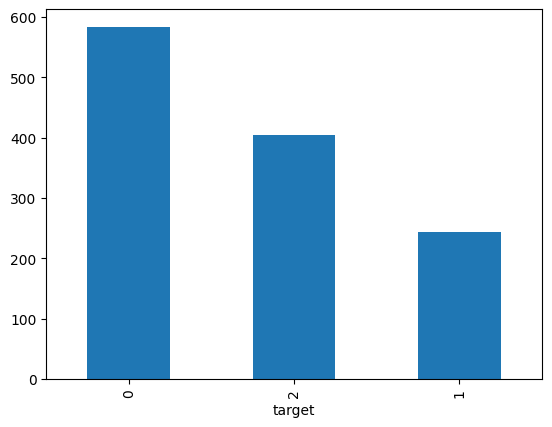

In [14]:
comment_df['target'].value_counts().plot(kind='bar')

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer = my_tokenizer
    # 실제로 만들 때는 단어 빈도수 등 확인하고 파라미터 추가
)

X = tfidf_vectorizer.fit_transform(comment_df['preprocessed_comment'])
y = comment_df['target']

C:\Users\user\.conda\envs\ml-env\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [19]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X, y)

LogisticRegression()

In [20]:
def sentiment_predict(sentence):
  sentence_norm_stem = okt.morphs(sentence, stem=True, norm=True)
  sentence_test = ' '.join(sentence_norm_stem)

  text_vector = tfidf_vectorizer.transform([sentence_test])

  pred = log_clf.predict(text_vector)
  print(sentence, "====>", pred)

In [21]:
sentiment_predict('위생은 좀 더럽지만 맛은 괜찮았어요')

위생은 좀 더럽지만 맛은 괜찮았어요 ====> [1]


In [22]:
sentiment_predict('와 존맛탱')

와 존맛탱 ====> [0]
